In [1]:
from tensorflow.keras import datasets, layers, models

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

ModuleNotFoundError: No module named 'cv2'

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train[:9]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test = y_test.reshape(-1,)

In [10]:
classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

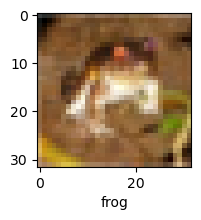

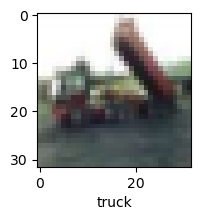

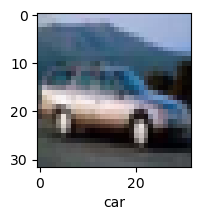

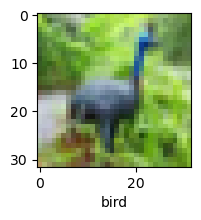

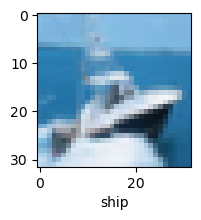

In [12]:
for i in range(0,10,2):
    plot_sample(x_train, y_train, i)

In [13]:
x_train = x_train/255


In [14]:
x_test = x_test/255

In [15]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation ='relu'),
    layers.Dense(1000,activation ='relu'),
    layers.Dense(10,  activation ='softmax')
])

ann.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.8107 - accuracy: 0.3554
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.6251 - accuracy: 0.4264
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5429 - accuracy: 0.4555
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4826 - accuracy: 0.4781
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.4339 - accuracy: 0.4936
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.3932 - accuracy: 0.5090
Epoch 7/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.3522 - accuracy: 0.5247
Epoch 8/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.3199 - accuracy: 0.5368
Epoch 9/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2864 - accuracy: 0.5490
Epoch 10/10
1563/1563 [==============================] - 67s 43m

In [17]:
cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.Flatten(),
    layers.Dense(256,activation ='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,  activation ='softmax')
])

cnn.compile(optimizer = 'SGD',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

cnn.fit(x_train, y_train, epochs = 5)

# discarded

Epoch 1/5
1563/1563 [==============================] - 30s 19ms/step - loss: 2.0998 - accuracy: 0.2231
Epoch 2/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.7761 - accuracy: 0.3566
Epoch 3/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5706 - accuracy: 0.4293
Epoch 4/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4528 - accuracy: 0.4790
Epoch 5/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3675 - accuracy: 0.5086


In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(32,activation ='relu'),
    layers.Dense(64,activation ='relu'),
    layers.Dense(10,  activation ='softmax')
])

ann.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(x_train, y_train, epochs = 10)

# discarded

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9321 - accuracy: 0.2916
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8158 - accuracy: 0.3409
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7857 - accuracy: 0.3553
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7624 - accuracy: 0.3653
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7497 - accuracy: 0.3689
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7395 - accuracy: 0.3733
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7280 - accuracy: 0.3768
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7211 - accuracy: 0.3790
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7135 - accuracy: 0.3813
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.703

In [44]:
cnn2 = models.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation ='relu'),
    layers.Dense(10,  activation ='softmax')
])

cnn2.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

cnn2.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 23s 14ms/step - loss: 1.4539 - accuracy: 0.4771
Epoch 2/50
1563/1563 [==============================] - 23s 14ms/step - loss: 1.1126 - accuracy: 0.6072
Epoch 3/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9832 - accuracy: 0.6598
Epoch 4/50
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9013 - accuracy: 0.6877
Epoch 5/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8319 - accuracy: 0.7116
Epoch 6/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7784 - accuracy: 0.7315
Epoch 7/50
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7272 - accuracy: 0.7457
Epoch 8/50
1563/1563 [==============================] - 23s 14ms/step - loss: 0.6812 - accuracy: 0.7627
Epoch 9/50
1563/1563 [==============================] - 23s 14ms/step - loss: 0.6431 - accuracy: 0.7749
Epoch 10/50
1563/1563 [==============================] - 23s 15m

In [45]:
cnn2.fit(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.7995 - accuracy: 0.5825


In [46]:
cnn2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0777 - accuracy: 0.6426


[1.0777451992034912, 0.6425999999046326]

In [47]:
from sklearn.metrics import precision_score, f1_score

In [24]:
# ann.fit(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7173 - accuracy: 0.3790


In [25]:
# cnn3 = models.Sequential([
#     layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (32, 32, 3)),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(32,(3,3),activation = 'relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(64,activation ='relu'),
#     layers.Dense(10,  activation ='softmax')
# ])

# cnn3.compile(optimizer = 'adam',
#            loss = 'sparse_categorical_crossentropy',
#            metrics = ['accuracy'])

# cnn3.fit(x_train, y_train, epochs = 10)

# discarded

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.5009 - accuracy: 0.4598
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1882 - accuracy: 0.5800
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0597 - accuracy: 0.6272
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9886 - accuracy: 0.6545
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9275 - accuracy: 0.6755
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8873 - accuracy: 0.6896
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8486 - accuracy: 0.7040
Epoch 8/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8096 - accuracy: 0.7169
Epoch 9/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7830 - accuracy: 0.7268
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [48]:
y_predicted = cnn2.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

313/313 [==============================] - 1s 5ms/step


In [50]:
# print('Pression : ', precision_score(y_test, y_predicted, average = 'weighted'))
# print('F1_score : ', f1_score(y_test, y_predicted, average= 'weighted'))

Text(95.72222222222221, 0.5, 'Truth')

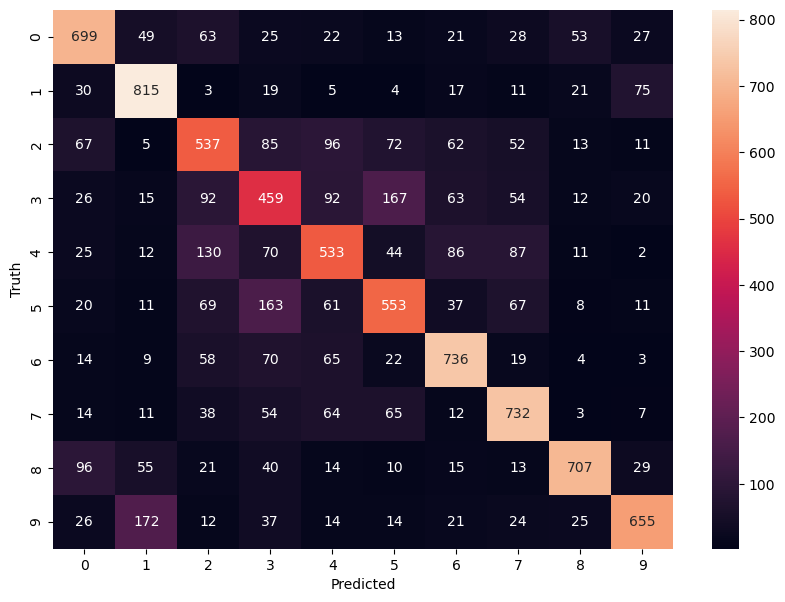

In [51]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels = y_test, predictions =y_predicted_labels)
plt.figure(figsize= (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
from PIL import Image


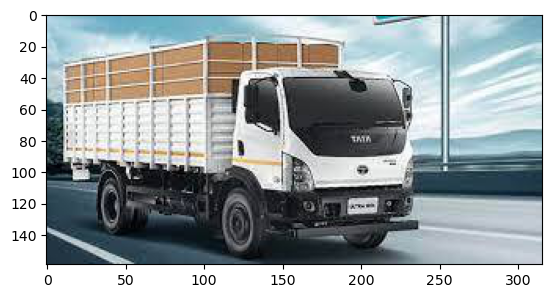

In [40]:
pic = Image.open('C://Users//Vansh Samaiya//Music//CIFAR10//test_Image//t1.jpg')
plt.imshow(pic)

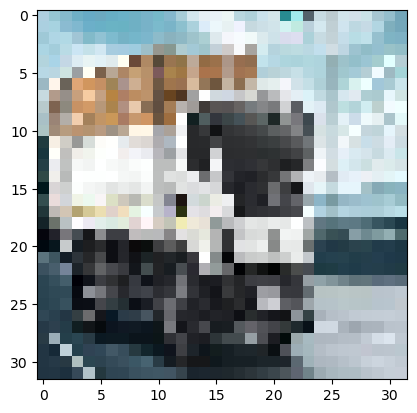

In [29]:
from tensorflow.keras.preprocessing import image

img1_path = 'C://Users//Vansh Samaiya//Music//CIFAR10//test_Image//t1.jpg'
img1 = image.load_img(img1_path, target_size = (32,32))

plt.imshow(img1)
# img1 = image.img_to_array(img1)


In [31]:
img_array = image.img_to_array(img1)
img_array = np.expand_dims(img_array, axis =0)
img_array /= 255

predictions = cnn2.predict(img_array)
predicted_class = np.argmax(predictions[0])
print('Predicted class :', predicted_class)


1/1 [==============================] - 0s 82ms/step
Predicted class : 9


Predicted Class : truck
Confidence : 0.9997105


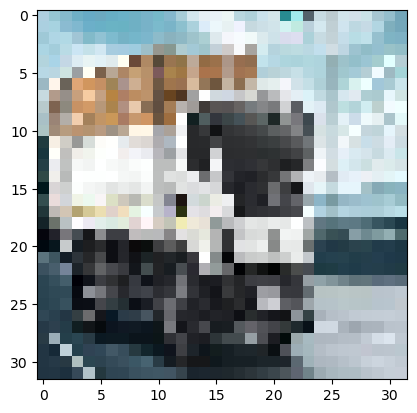

In [38]:
plt.imshow(img1)
# plt.xlabel(classes[predicted_class])
print('Predicted Class :', classes[predicted_class])
print("Confidence :", predictions[0][predicted_class])

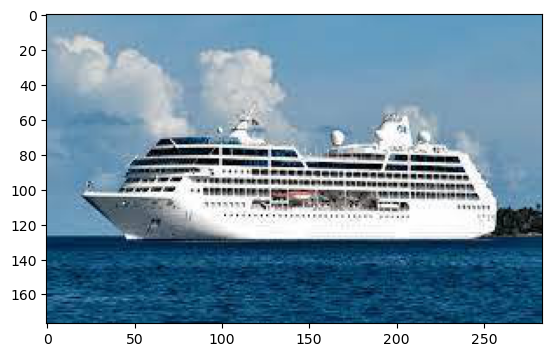

In [52]:
pic = Image.open('C://Users//Vansh Samaiya//Music//CIFAR10//test_Image//t2.jpg')
plt.imshow(pic)

1/1 [==============================] - 0s 18ms/step
Predicted Class : ship
Confidence : 0.903033


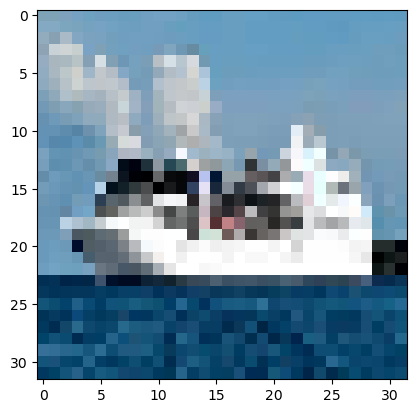

In [53]:
img2_path = 'C://Users//Vansh Samaiya//Music//CIFAR10//test_Image//t2.jpg'
pic = Image.open(img2_path)
plt.imshow(pic)


img2 = image.load_img(img2_path, target_size = (32,32))

img_array = image.img_to_array(img2)
img_array = np.expand_dims(img_array, axis =0)
img_array /= 255

predictions = cnn2.predict(img_array)
predicted_class = np.argmax(predictions[0])

plt.imshow(img2)
# plt.xlabel(classes[predicted_class])
print('Predicted Class :', classes[predicted_class])
print("Confidence :", predictions[0][predicted_class])

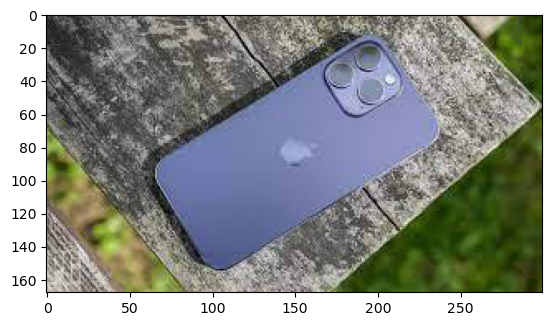

In [54]:
pic = Image.open('C://Users//Vansh Samaiya//Music//CIFAR10//test_Image//t3.jpg')
plt.imshow(pic)

1/1 [==============================] - 0s 17ms/step
Predicted Class : truck
Confidence : 0.3035297


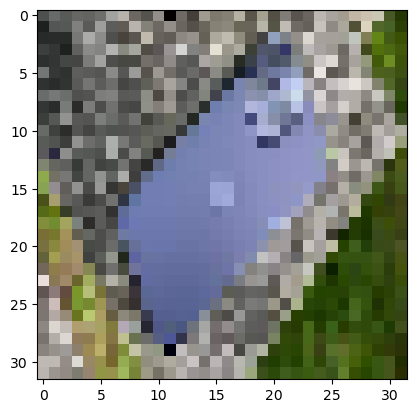

In [55]:
img3_path = 'C://Users//Vansh Samaiya//Music//CIFAR10//test_Image//t3.jpg'
pic = Image.open(img3_path)
plt.imshow(pic)


img3 = image.load_img(img3_path, target_size = (32,32))

img_array = image.img_to_array(img3)
img_array = np.expand_dims(img_array, axis =0)
img_array /= 255

predictions = cnn2.predict(img_array)
predicted_class = np.argmax(predictions[0])

plt.imshow(img3)
# plt.xlabel(classes[predicted_class])
print('Predicted Class :', classes[predicted_class])
print("Confidence :", predictions[0][predicted_class])